In [1]:
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))  # ugly workaround
from core import nlp
from core import preprocessing

In [2]:
# I/O
df = pd.read_csv('../../data/the-office_lines.csv', index_col = 0)

In [3]:
# Preprocessing
df = preprocessing.preprocessing_pipeline(df=df, column='line', verbose=True)

In [4]:
# Get data for michael
df_michael = nlp.get_counts_per_line_for_specific_characters_vs_others(df, 'Michael')

In [5]:
# Create coloring scheme based on the (signed) distance to the y=x line 
# top left is more others, bottom right is more michael
df_michael['dist'] = (df_michael['Others_norm'] - df_michael['Michael_norm']) * (np.sqrt(2)/2)
df_michael['dist_quantized'] = pd.qcut(df_michael['dist'].rank(method='first'), 5, labels=list(range(5)))

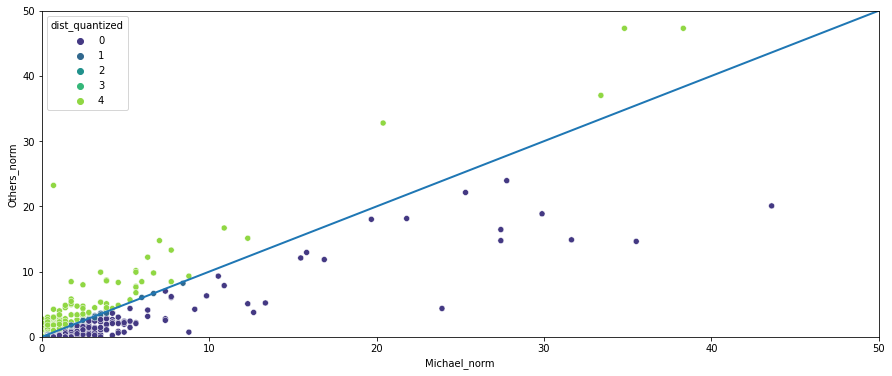

In [6]:
# Plot
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(x='Michael_norm', y='Others_norm', hue='dist_quantized', data=df_michael, ax = ax, palette='viridis')
ax.plot([0, 120], [0, 120], linewidth=2)
ax.set_xlim([0,50]); ax.set_ylim([0,50]);

In [36]:
# Print top 10 most characteristic to Michael (lowest distance, i.e., highest negative)
df_michael['dist'].sort_values(ascending=True).head(10)

line
Okay            -21.050959
All right       -16.629604
You know what   -14.760663
Here we go      -13.827254
Alright         -11.854629
Good             -8.956602
Ok               -7.788453
Come on          -7.758957
God              -6.298790
No, no, no       -5.769499
Name: dist, dtype: float64

In [35]:
# Most non-michael lines
df_michael['dist'].sort_values(ascending=False).head(10)

line
Yeah       33.729255
Michael    15.927585
What       13.589650
Hey         8.834040
”           8.762385
Oh          6.347730
Great       5.464000
Andy        4.745070
Whoa        4.528468
Sure        4.164795
Name: dist, dtype: float64

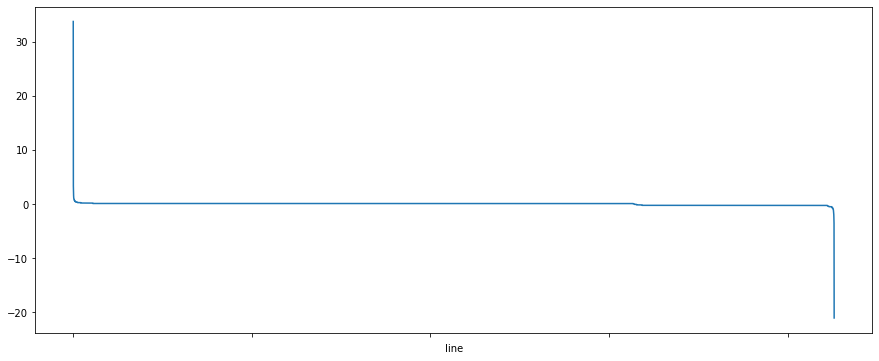

In [26]:
fig, ax = plt.subplots(figsize = (15,6))
df_michael['dist'].sort_values(ascending=False).plot(ax=ax)
ax.set_xticklabels([]);